# Point in Polygon & Intersect

In [49]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import shapely.speedups
shapely.speedups.enable()

%matplotlib inline

# Import KML drivers (read/write)
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

## Within / Contains

In [14]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

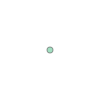

In [11]:
p1

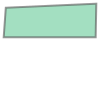

In [12]:
# Create a Polygon
pol_coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(pol_coords)
poly

In [15]:
# Check if point 1 is inside the Polygon
p1.within(poly)

True

In [16]:
# Check if point 2 is inside the Polygon
p2.within(poly)

False

In [17]:
# Check if polygon contains a point
poly.contains(p1)

True

## Intersect

In [19]:
# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [20]:
# Check if lines intersect
line_a.intersects(line_b)

True

In [21]:
# Check if lines touch
line_a.touches(line_b)

True

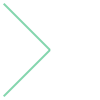

In [23]:
from shapely.geometry import LineString, MultiLineString

# We can see this by plotting the features together
# Create a MultiLineString
multiline = MultiLineString([line_a, line_b])
multiline

## Point in Polygon using Geopandas

In [26]:
# Filepath: Geocoded addresses & Polygons
adr_fp = r'data/addresses_geocode.shp'
poly_fp = r'data/PKS_suuralue.kml'

In [27]:
# Read shapefile of addresses
data = gpd.read_file(adr_fp)
data.head()

,addr,address,geometry,id
0,"Itämerenkatu 14, 00101 Helsinki, Finland","Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.9155655 60.1632005),1000
1,"Kampinkuja 1, 00100 Helsinki, Finland","Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.9316914 60.1690222),1001
2,"Kaivokatu 8, 00101 Helsinki, Finland","Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",POINT (24.94244049213 60.16988445),1002
3,"Hermannin rantatie 1, 00580 Helsinki, Finland","Hermannin rantatie, Kyläsaari, Hermanni, Helsi...",POINT (24.9709473 60.1975589),1003
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland","Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",POINT (24.9215601 60.1566956),1005


In [33]:
# Read KML polygons
polys= gpd.read_file(poly_fp, driver='KML')
polys.head()

,Description,Name,geometry
0,,Suur-Espoonlahti,POLYGON Z ((24.775059677807 60.1090604462157 0...
1,,Suur-Kauklahti,POLYGON Z ((24.6157775254076 60.1725681273527 ...
2,,Vanha-Espoo,POLYGON Z ((24.6757633262026 60.2120070032819 ...
3,,Pohjois-Espoo,POLYGON Z ((24.767921197401 60.2691954732391 0...
4,,Suur-Matinkylä,POLYGON Z ((24.7536131356802 60.1663051341717 ...


In [40]:
# Select the southern disctrict
southern = polys.loc[polys['Name']=='Eteläinen']
southern.reset_index(drop=True, inplace=True)
southern

,Description,Name,geometry
0,,Eteläinen,"POLYGON Z ((24.7827651307035 60.09997268858 0,..."


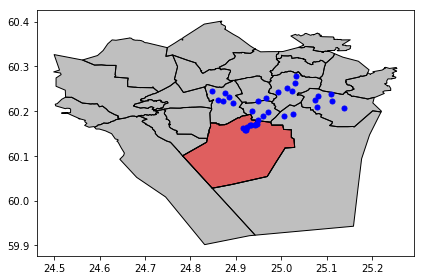

In [47]:
# Create figure and axes
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')
data.plot(ax=ax, color='blue', markersize=5)
plt.tight_layout()

In [50]:
# Select points that fall inside Southern District
pointinpoly_mask = data.within(southern.loc[0,'geometry'])
pointinpoly_mask.head()

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [55]:
pointinpoly_data = data.loc[pointinpoly_mask]
pointinpoly_data

,addr,address,geometry,id
0,"Itämerenkatu 14, 00101 Helsinki, Finland","Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.9155655 60.1632005),1000
1,"Kampinkuja 1, 00100 Helsinki, Finland","Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.9316914 60.1690222),1001
2,"Kaivokatu 8, 00101 Helsinki, Finland","Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",POINT (24.94244049213 60.16988445),1002
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland","Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",POINT (24.9215601 60.1566956),1005
10,"Rautatientori 1, 00100 Helsinki, Finland","Rautatientori, Keskusta, Kluuvi, Eteläinen suu...",POINT (24.9440942536239 60.17130125),1011
30,"Urho Kekkosen katu 1, 00100 Helsinki, Finland","Kampin keskus, 1, Urho Kekkosen katu, Kamppi, ...",POINT (24.9331155798105 60.1690911),1031
31,"Ruoholahdenkatu 17, 00101 Helsinki, Finland","Ruoholahdenkatu, Hietalahti, Kamppi, Eteläinen...",POINT (24.9251045 60.1649874),1032
32,"Tyynenmerenkatu 3, 00220 Helsinki, Finland","3, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E...",POINT (24.9212065 60.1587845),1033
33,"Vilhonkatu 4, 00101 Helsinki, Finland","4, Vilhonkatu, Keskusta, Kluuvi, Eteläinen suu...",POINT (24.9473289 60.1718719),1034


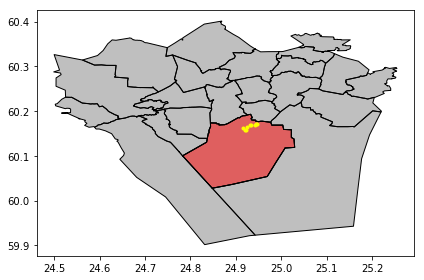

In [58]:
# Create figure and axes
fig, ax = plt.subplots()
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')
pointinpoly_data.plot(ax=ax, color='yellow', markersize=3)
plt.tight_layout()